In [27]:
import os
import sys

root_dir = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
model_dir = os.path.join(root_dir, "model")
sys.path.append(root_dir)
sys.path.append(model_dir)

from collections import defaultdict
import itertools
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hoho_utils

os.environ['CUDA_VISIBLE_DEVICES']='1' 
plt.style.use('ggplot')

### 数据预处理

In [28]:
def suffix_time():
    current_time = time.time()
    local_time = time.localtime(current_time)
    time_str = time.strftime('%Y%m%d%H%M%S', local_time)
    return time_str

In [29]:
#test
hoho_utils.INDEXS_2_PIECES

'KARBNPCkarbnpc'

In [30]:
suffix = suffix_time()
suffix

'20230912215110'

In [31]:
data_dir = "../output/data"
file_list = os.listdir(data_dir)
file_count = len(file_list)
item_list = list()

print(f"file_count: {file_count}")

for i, filename in enumerate(file_list):
    file_path = os.path.join(data_dir, filename)
    with open(file_path, "r") as file:
        json_str = file.read()
        matches = json.loads(json_str)
        match_count = len(matches)

        for j, match in enumerate(matches):
#             print(f"match: {match}")
#             break

            base_id =  int(time.time() * 1000) + j
            for k, round in enumerate(match):
                match_id = f"{i}-{j}"
                round_id = f"{base_id}{k}"
                state = round[0]
                action = round[2]
                next_state = round[3]
                chapture_list = round[6]
                chaptures = ','.join(chapture_list)
                chapture_reward = round[7]

                win = 0
                done = round[5]
                if "K" in chapture_list:
                    win = -1
                    done = True
                elif "k" in chapture_list:
                    win = 1
                    done = True

                round_dict = {"match_id": match_id,
                              "round_id": round_id,
                              "state": state,
                              "action":action,
                              "next_state": next_state,
                              "done": done,
                              "chaptures": chaptures,
                              "chapture_reward": chapture_reward,
                              "win": win}
                item_list.append(round_dict)

                if win == 1 or win == -1:
                    break

file_count: 338


In [32]:
data = pd.DataFrame(item_list)

In [33]:
data.head(20)

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win
0,0-0,16945266706620,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
1,0-0,16945266706621,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
2,0-1,16945266706630,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
3,0-1,16945266706631,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
4,0-2,16945266706640,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
5,0-2,16945266706641,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
6,0-3,16945266706650,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
7,0-3,16945266706651,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
8,0-4,16945266706660,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,a0a1,1NBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5...,False,N,-6.28,0
9,0-4,16945266706661,1cBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/7c1...,b2b4,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/7c1...,False,,0.00,0


In [34]:
len(data[data["win"] == 0]), len(data[data["win"] == 1]), len(data[data["win"] == -1])

(24972, 1, 10052)

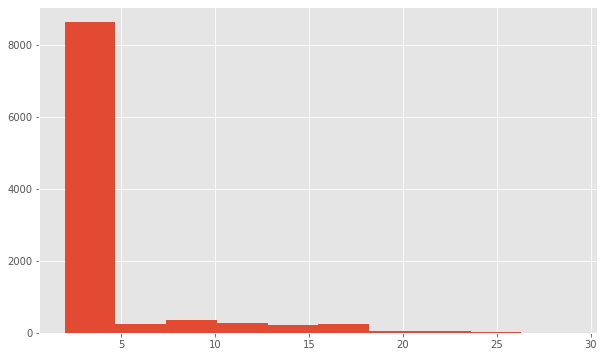

In [49]:
### 看看对战轮数的分布

data_round_count = data.groupby(["match_id"], as_index = True)["round_id"].count().reset_index(name = "count")
# data_round_count

plt.figure(figsize = (10, 6))
plt.hist(data_round_count["count"].values)
plt.show()

In [35]:
# data2 = data.groupby(["match_id"], as_index = False).agg({"action": lambda x: ".".join(x), "chapture_reward": sum})

### hoho_todo: 如果出现重复动作，如何分配？
data2 = data.groupby(["match_id"], as_index = False).agg({"action": lambda x: ",".join(x.unique()), "chapture_reward": sum, "win": min})
data2.rename(columns = {"action": "action_sequence", "chapture_reward": "chapture_value"}, inplace = True)

In [36]:
data2

,match_id,action_sequence,chapture_value,win
0,0-0,"f0e1,h2g2",-11.20,-1
1,0-1,"f0e1,h2g2",-11.20,-1
2,0-10,"e0e1,e1f1,i0i2,h2g2,a0a1,b2b5,i2i0,b5h5",-39.07,-1
3,0-11,"f0e1,h2g2",-11.20,-1
4,0-12,"e0e1,b2b4,h2e2,e2g2,c0a2,b0d1,e1e2,a2c4,e2f2,g...",-101.55,-1
...,...,...,...,...
10049,99-5,"f0e1,h2g2",-11.20,-1
10050,99-6,"e0e1,h2d2,d2d5,b2g2,g0i2,a3a4,a4a5,a0a5,b0c2,g...",-99.55,-1
10051,99-7,"f0e1,h2g2",-11.20,-1
10052,99-8,"f0e1,h2g2",-11.20,-1


In [37]:
data3 = data2.groupby("action_sequence", as_index = False).agg({"chapture_value": lambda x: x.mean(), "win": sum})
data3.rename(columns = {"win": "win_count"}, inplace = True)

In [38]:
data3

,action_sequence,chapture_value,win_count
0,"a0a1,a1c1,b2b8,c1f1,f1f8,c3c4,g0i2,e3e4,c0a2",-96.17,-1
1,"a0a1,b2b4,a1b1,h2d2,g0e2,b1f1,d0e1,e1f2",-37.61,-1
2,"a0a1,b2b4,a1b1,i3i4,b1e1,e1d1,h2b2,g3g4",-37.61,-1
3,"a0a1,b2b4,a1d1,d1a1,a1f1,h2h5,h0i2,f0e1,f1f6,f...",-105.37,-2
4,"a0a1,b2b4,a1d1,d1a1,f0e1,h2h4,h0i2,c0a2",-62.02,-1
...,...,...,...
805,"f0e1,g0e2,h2h7,b2b3,a0a1,a1a2",-49.45,-2
806,"f0e1,g0e2,h2h7,b2b9,h7e7,a3a4,a0a2,a2a0,g3g4",-87.71,-1
807,"f0e1,h2g2",-11.20,-7811
808,"f0e1,h2h5",-11.20,-363


In [39]:
actions_list = data3["action_sequence"].values.tolist()
# list(map(lambda x: x.split(","), actions_list))

In [40]:
# demo
# test_list = ["e0e1", "e1f1", "i0i2", "h2g2", "a0a1", "b2b5", "i2i0", "b5h5"]
# sorted(test_list)
# subsets(test_list)

In [41]:
# demo
# test_list2 = ["e0e1", "e1f1", "e0e1"]
# frozenset(test_list2)

### 计算shapley value

In [125]:
from itertools import chain, combinations
from tqdm import tqdm
from collections import Counter, defaultdict


class SimplifiedShapleyAttributionModel:
    
    def powerset(self, x):
        s = list(x)
        return chain.from_iterable(combinations(s, r) for r in range(len(s) + 1))

    
    def _phi(self, channel_index):
        S_channel = [k for k in self.journeys.keys() if channel_index in k]
        score = 0
        print(f"Computing phi for channel {channel_index}...")
        for S in tqdm(S_channel):
            score += self.journeys[S] / len(S)
        print(f"Attribution score for channel {channel_index}: {score:.2f}")
        print()
        return score

    
    def attribute(self, df):
        actions_list = data3["action_sequence"].values.tolist()
        journeys_list = list(map(lambda x: x.split(","), actions_list))
        
        self.P = set(chain(*journeys_list))
#         print(f"self.P: {self.P}")
        print("Running Simplified Shapley Attribution Model...")
        print(f"Found {len(self.P)} unique channels!")
        
        print("Computing journey statistics...")
        value_dict = defaultdict(int)
        for i in range(len(df)):
            row = df.iloc[i]
            key = frozenset(row["action_sequence"].split(","))
            value = row["win_count"]         # 用所赢局数做奖励函数（负数表示所输局数）
#             value = row["chapture_value"]  # 用所吃棋子棋力做奖励函数（负数表示被吃棋子）
            value_dict[key] += value
        
        self.journeys = value_dict
        
#         print(f"self.journeys: {self.journeys}")
        
        print(f"Computing attributions...")
        print()
        return {j: self._phi(j) for j in self.P}

In [126]:
model = SimplifiedShapleyAttributionModel()
result = model.attribute(data3)

Running Simplified Shapley Attribution Model...
Found 670 unique channels!
Computing journey statistics...
Computing attributions...

Computing phi for channel e2f2...


100%|███████████████████████████████████████| 28/28 [00:00<00:00, 28062.25it/s]


Attribution score for channel e2f2: -5.82

Computing phi for channel g2e1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel g2e1: -0.94

Computing phi for channel b0c0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b0c0: -0.17

Computing phi for channel h2a2...


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 4010.81it/s]


Attribution score for channel h2a2: -0.51

Computing phi for channel a0a5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel a0a5: -0.08

Computing phi for channel b6b0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b6b0: -0.10

Computing phi for channel b6b3...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel b6b3: -0.25

Computing phi for channel f6f0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f6f0: -0.20

Computing phi for channel i1h3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel i1h3: -0.08

Computing phi for channel c1c2...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel c1c2: -0.45

Computing phi for channel b2c0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b2c0: -0.79

Computing phi for channel h2h0...


100%|██████████████████████████████████████████████████| 27/27 [00:00<?, ?it/s]


Attribution score for channel h2h0: -6.24

Computing phi for channel b4b5...


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Attribution score for channel b4b5: -1.28

Computing phi for channel d2d6...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel d2d6: -0.96

Computing phi for channel e0c1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e0c1: -0.06

Computing phi for channel b4h4...


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 6011.90it/s]


Attribution score for channel b4h4: -0.63

Computing phi for channel d2d5...


100%|██████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Attribution score for channel d2d5: -0.85

Computing phi for channel e4g4...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel e4g4: -0.37

Computing phi for channel h5h3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h5h3: -0.07

Computing phi for channel b2d2...


100%|██████████████████████████████████████████████████| 27/27 [00:00<?, ?it/s]


Attribution score for channel b2d2: -6.22

Computing phi for channel a2a1...


100%|██████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


Attribution score for channel a2a1: -3.40

Computing phi for channel b1c1...


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 4017.53it/s]


Attribution score for channel b1c1: -0.68

Computing phi for channel c2a2...


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 3010.27it/s]


Attribution score for channel c2a2: -0.19

Computing phi for channel d7c7...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel d7c7: -0.11

Computing phi for channel b3b5...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel b3b5: -1.75

Computing phi for channel b4i4...


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 3009.55it/s]


Attribution score for channel b4i4: -0.18

Computing phi for channel h1h8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h1h8: -0.80

Computing phi for channel a5b5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel a5b5: -0.11

Computing phi for channel c1g1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel c1g1: -0.32

Computing phi for channel a2g2...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel a2g2: -1.97

Computing phi for channel d2f2...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel d2f2: -1.06

Computing phi for channel c1b1...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel c1b1: -1.72

Computing phi for channel b1b7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b1b7: -0.07

Computing phi for channel f2h2...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel f2h2: -0.93

Computing phi for channel b6b4...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]

Attribution score for channel b6b4: -0.76

Computing phi for channel a0c0...



100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel a0c0: -0.94

Computing phi for channel c2a1...


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Attribution score for channel c2a1: -2.14

Computing phi for channel b5c5...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel b5c5: -0.32

Computing phi for channel i2d2...


100%|██████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Attribution score for channel i2d2: -2.15

Computing phi for channel a0a1...


100%|████████████████████████████████████████████████| 268/268 [00:00<?, ?it/s]


Attribution score for channel a0a1: -70.06

Computing phi for channel g1f1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel g1f1: -0.20

Computing phi for channel g2e3...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g2e3: -0.13

Computing phi for channel b2b8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b2b8: -0.11

Computing phi for channel b1g1...


100%|██████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


Attribution score for channel b1g1: -1.45

Computing phi for channel c1d1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel c1d1: -0.76

Computing phi for channel b5i5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b5i5: -0.55

Computing phi for channel b0b8...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel b0b8: -1.08

Computing phi for channel b2e2...


100%|██████████████████████████████████████████████████| 29/29 [00:00<?, ?it/s]


Attribution score for channel b2e2: -6.47

Computing phi for channel a4e4...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1004.38it/s]


Attribution score for channel a4e4: -0.06

Computing phi for channel h4h9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h4h9: -0.12

Computing phi for channel e6e4...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel e6e4: -0.25

Computing phi for channel e4c4...


100%|██████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Attribution score for channel e4c4: -2.64

Computing phi for channel b2b1...


100%|██████████████████████████████████████████████████| 92/92 [00:00<?, ?it/s]


Attribution score for channel b2b1: -19.98

Computing phi for channel e4e5...


100%|██████████████████████████████████████████████████| 48/48 [00:00<?, ?it/s]


Attribution score for channel e4e5: -7.04

Computing phi for channel e2e3...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel e2e3: -1.35

Computing phi for channel h5h4...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1008.00it/s]


Attribution score for channel h5h4: -0.05

Computing phi for channel b2a2...


100%|██████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


Attribution score for channel b2a2: -4.27

Computing phi for channel g2d2...


100%|██████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Attribution score for channel g2d2: -1.10

Computing phi for channel h4h0...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h4h0: -0.30

Computing phi for channel a2b4...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel a2b4: -0.85

Computing phi for channel a2b2...


100%|██████████████████████████████████████████████████| 61/61 [00:00<?, ?it/s]


Attribution score for channel a2b2: -10.40

Computing phi for channel f1i1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f1i1: -0.93

Computing phi for channel b5e5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b5e5: -0.82

Computing phi for channel g2f4...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g2f4: -0.47

Computing phi for channel c4f4...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.70it/s]


Attribution score for channel c4f4: -0.04

Computing phi for channel g6g8...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g6g8: -0.14

Computing phi for channel h7e7...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h7e7: -0.21

Computing phi for channel c1c5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c1c5: -0.05

Computing phi for channel d2d7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d2d7: -0.06

Computing phi for channel i1b1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel i1b1: -0.12

Computing phi for channel g6g5...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel g6g5: -0.27

Computing phi for channel h0h1...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel h0h1: -5.33

Computing phi for channel g0g1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g0g1: -1.18

Computing phi for channel e2g0...


100%|██████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Attribution score for channel e2g0: -1.62

Computing phi for channel e4h4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e4h4: -0.15

Computing phi for channel h2h3...


100%|██████████████████████████████████████████████████| 34/34 [00:00<?, ?it/s]


Attribution score for channel h2h3: -10.17

Computing phi for channel d2d0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d2d0: -0.05

Computing phi for channel e5g5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e5g5: -0.07

Computing phi for channel d2d9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d2d9: -0.25

Computing phi for channel g4i4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g4i4: -0.09

Computing phi for channel d0e1...


100%|██████████████████████████████████████████████████| 91/91 [00:00<?, ?it/s]


Attribution score for channel d0e1: -51.77

Computing phi for channel h4h5...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h4h5: -0.29

Computing phi for channel d2d3...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel d2d3: -0.42

Computing phi for channel b4e4...


100%|██████████████████████████████████████████████████| 35/35 [00:00<?, ?it/s]


Attribution score for channel b4e4: -7.15

Computing phi for channel i3i1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel i3i1: -0.30

Computing phi for channel h0h4...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h0h4: -0.18

Computing phi for channel e3e1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e3e1: -0.06

Computing phi for channel f5f7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f5f7: -0.06

Computing phi for channel a2a0...


100%|██████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Attribution score for channel a2a0: -1.97

Computing phi for channel d7a7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d7a7: -0.05

Computing phi for channel g0e2...


100%|██████████████████████████████████████████████████| 94/94 [00:00<?, ?it/s]


Attribution score for channel g0e2: -30.88

Computing phi for channel e2c4...


100%|██████████████████████████████████████████████████| 33/33 [00:00<?, ?it/s]


Attribution score for channel e2c4: -9.13

Computing phi for channel g1g6...


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 4011.77it/s]


Attribution score for channel g1g6: -0.34

Computing phi for channel a4a5...


100%|██████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]


Attribution score for channel a4a5: -1.37

Computing phi for channel a2c4...


100%|██████████████████████████████████████████████████| 56/56 [00:00<?, ?it/s]


Attribution score for channel a2c4: -17.85

Computing phi for channel b3b1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b3b1: -0.20

Computing phi for channel b5h5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b5h5: -2.25

Computing phi for channel e6e7...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel e6e7: -0.15

Computing phi for channel d8h8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d8h8: -0.10

Computing phi for channel h4f4...


100%|███████████████████████████████████████| 39/39 [00:00<00:00, 39086.70it/s]


Attribution score for channel h4f4: -9.32

Computing phi for channel h5h7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h5h7: -0.12

Computing phi for channel h3h1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h3h1: -0.47

Computing phi for channel b3b7...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel b3b7: -0.29

Computing phi for channel h3h8...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h3h8: -0.20

Computing phi for channel g0f0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g0f0: -0.39

Computing phi for channel f5e5...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel f5e5: -0.67

Computing phi for channel b2f2...


100%|██████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]


Attribution score for channel b2f2: -4.00

Computing phi for channel h4h8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h4h8: -0.09

Computing phi for channel f6f3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f6f3: -0.05

Computing phi for channel e5d5...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel e5d5: -0.45

Computing phi for channel c4e2...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel c4e2: -0.75

Computing phi for channel b8i8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b8i8: -0.08

Computing phi for channel b4g4...


100%|██████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Attribution score for channel b4g4: -2.00

Computing phi for channel d2e1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel d2e1: -0.33

Computing phi for channel f3f2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f3f2: -0.06

Computing phi for channel h2c2...


100%|██████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]


Attribution score for channel h2c2: -3.84

Computing phi for channel b8b9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b8b9: -0.12

Computing phi for channel d4d9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d4d9: -0.07

Computing phi for channel b1b0...


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Attribution score for channel b1b0: -3.87

Computing phi for channel b1a1...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel b1a1: -1.35

Computing phi for channel b0b6...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel b0b6: -0.76

Computing phi for channel d1f1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel d1f1: -0.41

Computing phi for channel i2f2...


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Attribution score for channel i2f2: -4.04

Computing phi for channel b5b0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b5b0: -0.23

Computing phi for channel f1g1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel f1g1: -0.19

Computing phi for channel d3g3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d3g3: -0.06

Computing phi for channel f3f4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f3f4: -0.08

Computing phi for channel h2b2...


100%|████████████████████████████████████| 106/106 [00:00<00:00, 106235.66it/s]


Attribution score for channel h2b2: -20.90

Computing phi for channel i4i7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel i4i7: -0.08

Computing phi for channel h5f5...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h5f5: -0.51

Computing phi for channel c1a2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c1a2: -0.07

Computing phi for channel d1d4...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel d1d4: -0.54

Computing phi for channel h8d8...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h8d8: -0.32

Computing phi for channel b5b9...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b5b9: -0.25

Computing phi for channel e0e1...


100%|████████████████████████████████████████████████| 413/413 [00:00<?, ?it/s]


Attribution score for channel e0e1: -80.55

Computing phi for channel c0c1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel c0c1: -0.65

Computing phi for channel e1e2...


100%|██████████████████████████████████████████████████| 72/72 [00:00<?, ?it/s]


Attribution score for channel e1e2: -16.65

Computing phi for channel f2i2...


100%|██████████████████████████████████████████| 5/5 [00:00<00:00, 5017.11it/s]


Attribution score for channel f2i2: -0.52

Computing phi for channel h8e8...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h8e8: -0.99

Computing phi for channel f0f2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f0f2: -0.17

Computing phi for channel a4b4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel a4b4: -0.12

Computing phi for channel b2b6...


100%|██████████████████████████████████████████████████| 36/36 [00:00<?, ?it/s]


Attribution score for channel b2b6: -5.76

Computing phi for channel a1d1...


100%|██████████████████████████████████████████████████| 27/27 [00:00<?, ?it/s]


Attribution score for channel a1d1: -6.11

Computing phi for channel i4i5...


100%|██████████████████████████████████████████████████| 56/56 [00:00<?, ?it/s]


Attribution score for channel i4i5: -6.62

Computing phi for channel b2b5...


100%|██████████████████████████████████████████████████| 27/27 [00:00<?, ?it/s]


Attribution score for channel b2b5: -8.56

Computing phi for channel g2g1...


100%|██████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Attribution score for channel g2g1: -1.77

Computing phi for channel b5b8...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.46it/s]


Attribution score for channel b5b8: -0.08

Computing phi for channel i2g4...


100%|██████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Attribution score for channel i2g4: -1.75

Computing phi for channel h8h4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h8h4: -0.07

Computing phi for channel d1c1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel d1c1: -0.15

Computing phi for channel d5c5...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel d5c5: -0.32

Computing phi for channel d7h7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d7h7: -0.12

Computing phi for channel g1i1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel g1i1: -0.28

Computing phi for channel c2c3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c2c3: -0.04

Computing phi for channel f7e7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f7e7: -0.04

Computing phi for channel e1g1...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2003.49it/s]


Attribution score for channel e1g1: -1.38

Computing phi for channel h7d7...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h7d7: -0.22

Computing phi for channel b7b1...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1001.27it/s]


Attribution score for channel b7b1: -0.08

Computing phi for channel c1d3...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel c1d3: -0.26

Computing phi for channel b6b9...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel b6b9: -0.97

Computing phi for channel b1h1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel b1h1: -0.42

Computing phi for channel b6b8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b6b8: -0.05

Computing phi for channel i1i2...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel i1i2: -0.13

Computing phi for channel i0f0...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel i0f0: -2.16

Computing phi for channel e1c2...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel e1c2: -0.14

Computing phi for channel i1c1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel i1c1: -0.74

Computing phi for channel h1h7...


100%|██████████████████████████████████████████| 8/8 [00:00<00:00, 8023.54it/s]


Attribution score for channel h1h7: -0.74

Computing phi for channel h7f7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h7f7: -0.14

Computing phi for channel d6d3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d6d3: -0.10

Computing phi for channel f8a8...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f8a8: -0.10

Computing phi for channel f3f0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f3f0: -0.07

Computing phi for channel c2i2...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]

Attribution score for channel c2i2: -2.21

Computing phi for channel d6d1...



100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 3005.23it/s]


Attribution score for channel d6d1: -0.47

Computing phi for channel a2e2...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel a2e2: -0.70

Computing phi for channel c2e2...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel c2e2: -0.46

Computing phi for channel g4g9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g4g9: -0.05

Computing phi for channel d2h2...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel d2h2: -0.21

Computing phi for channel a2c0...


100%|██████████████████████████████████████████████████| 30/30 [00:00<?, ?it/s]


Attribution score for channel a2c0: -5.66

Computing phi for channel g4f4...


100%|██████████████████████████████████████████| 5/5 [00:00<00:00, 5014.71it/s]


Attribution score for channel g4f4: -1.22

Computing phi for channel f4f1...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel f4f1: -1.90

Computing phi for channel b2b7...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel b2b7: -1.05

Computing phi for channel c0d2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c0d2: -0.06

Computing phi for channel a2a3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel a2a3: -0.22

Computing phi for channel i0i2...


100%|██████████████████████████████████████████████████| 82/82 [00:00<?, ?it/s]


Attribution score for channel i0i2: -14.01

Computing phi for channel c4a4...


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 1002.54it/s]


Attribution score for channel c4a4: -1.39

Computing phi for channel d2g2...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel d2g2: -0.53

Computing phi for channel c3c4...


100%|███████████████████████████████████████| 92/92 [00:00<00:00, 92050.56it/s]


Attribution score for channel c3c4: -16.09

Computing phi for channel f3f7...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f3f7: -0.14

Computing phi for channel c2d0...


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 6017.65it/s]


Attribution score for channel c2d0: -1.10

Computing phi for channel h2f2...


100%|███████████████████████████████████████| 29/29 [00:00<00:00, 29043.65it/s]


Attribution score for channel h2f2: -5.81

Computing phi for channel i2i6...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel i2i6: -0.49

Computing phi for channel d6d8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d6d8: -0.10

Computing phi for channel d1e1...


100%|███████████████████████████████████████| 15/15 [00:00<00:00, 15091.04it/s]


Attribution score for channel d1e1: -1.05

Computing phi for channel b1b3...


100%|██████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Attribution score for channel b1b3: -2.50

Computing phi for channel f1f2...


100%|██████████████████████████████████████████████████| 33/33 [00:00<?, ?it/s]


Attribution score for channel f1f2: -3.46

Computing phi for channel h3h5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h3h5: -0.22

Computing phi for channel d5a5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel d5a5: -0.14

Computing phi for channel d4f4...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel d4f4: -0.48

Computing phi for channel e1b1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel e1b1: -0.18

Computing phi for channel a2c1...


100%|██████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Attribution score for channel a2c1: -1.77

Computing phi for channel b5b7...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1003.66it/s]


Attribution score for channel b5b7: -0.12

Computing phi for channel h7c7...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h7c7: -0.38

Computing phi for channel g2h2...


100%|██████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]


Attribution score for channel g2h2: -4.63

Computing phi for channel f1b1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f1b1: -0.25

Computing phi for channel e4f4...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel e4f4: -0.36

Computing phi for channel e6f6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e6f6: -0.06

Computing phi for channel b0b2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b0b2: -0.14

Computing phi for channel f1e1...


100%|██████████████████████████████████████████████████| 34/34 [00:00<?, ?it/s]


Attribution score for channel f1e1: -3.67

Computing phi for channel f7f4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f7f4: -0.05

Computing phi for channel e1c1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e1c1: -0.05

Computing phi for channel b8g8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b8g8: -0.05

Computing phi for channel d5d0...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.22it/s]


Attribution score for channel d5d0: -0.08

Computing phi for channel i2i1...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel i2i1: -2.24

Computing phi for channel b5a5...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel b5a5: -0.23

Computing phi for channel e2h2...


100%|███████████████████████████████████████| 10/10 [00:00<00:00, 10031.82it/s]


Attribution score for channel e2h2: -1.89

Computing phi for channel h2h1...


100%|███████████████████████████████████████| 23/23 [00:00<00:00, 23073.19it/s]


Attribution score for channel h2h1: -5.28

Computing phi for channel h8f8...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2004.45it/s]


Attribution score for channel h8f8: -0.18

Computing phi for channel b3b9...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b3b9: -0.17

Computing phi for channel f0a0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f0a0: -0.07

Computing phi for channel a2h2...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel a2h2: -0.39

Computing phi for channel i1h1...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel i1h1: -0.64

Computing phi for channel b2h2...


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 4013.69it/s]


Attribution score for channel b2h2: -0.33

Computing phi for channel e3c3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e3c3: -0.10

Computing phi for channel f2d2...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel f2d2: -0.54

Computing phi for channel h3h7...


100%|█████████████████████████████████████████| 1/1 [00:00<00:00, 34379.54it/s]


Attribution score for channel h3h7: -0.10

Computing phi for channel f1a1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f1a1: -0.12

Computing phi for channel h3h2...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h3h2: -0.62

Computing phi for channel b0b3...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel b0b3: -0.31

Computing phi for channel c2g2...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel c2g2: -0.29

Computing phi for channel d0d1...


100%|██████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]


Attribution score for channel d0d1: -1.20

Computing phi for channel e4d4...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2005.88it/s]


Attribution score for channel e4d4: -0.18

Computing phi for channel h6h3...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel h6h3: -0.71

Computing phi for channel b6b7...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel b6b7: -0.94

Computing phi for channel h5g5...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1001.98it/s]


Attribution score for channel h5g5: -0.07

Computing phi for channel c2c5...


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 500.57it/s]


Attribution score for channel c2c5: -0.05

Computing phi for channel f2f5...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel f2f5: -1.04

Computing phi for channel d2b2...


100%|███████████████████████████████████████| 22/22 [00:00<00:00, 21975.40it/s]


Attribution score for channel d2b2: -3.75

Computing phi for channel g2i2...


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Attribution score for channel g2i2: -3.20

Computing phi for channel c9d9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c9d9: -0.07

Computing phi for channel f8f4...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f8f4: -0.27

Computing phi for channel c4c5...


100%|██████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]

Attribution score for channel c4c5: -1.99

Computing phi for channel a1h1...



100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel a1h1: -1.52

Computing phi for channel h2h5...


100%|██████████████████████████████████████████████████| 38/38 [00:00<?, ?it/s]


Attribution score for channel h2h5: -186.59

Computing phi for channel h0h8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h0h8: -0.08

Computing phi for channel b7b2...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b7b2: -0.20

Computing phi for channel b4b0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b4b0: -0.21

Computing phi for channel d3d5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d3d5: -0.08

Computing phi for channel h8h3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h8h3: -0.08

Computing phi for channel a1f1...


100%|███████████████████████████████████████| 13/13 [00:00<00:00, 13038.25it/s]


Attribution score for channel a1f1: -3.29

Computing phi for channel f0e1...


100%|████████████████████████████████████████████████| 194/194 [00:00<?, ?it/s]


Attribution score for channel f0e1: -4159.41

Computing phi for channel h2h9...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel h2h9: -0.51

Computing phi for channel b7b4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b7b4: -0.12

Computing phi for channel h5h0...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.70it/s]


Attribution score for channel h5h0: -0.08

Computing phi for channel i1f1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel i1f1: -1.18

Computing phi for channel h3h0...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h3h0: -1.41

Computing phi for channel a1c1...


100%|██████████████████████████████████████████████████| 32/32 [00:00<?, ?it/s]


Attribution score for channel a1c1: -8.03

Computing phi for channel g1h3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g1h3: -0.05

Computing phi for channel b0b1...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel b0b1: -0.45

Computing phi for channel b7e7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b7e7: -0.05

Computing phi for channel h6h7...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h6h7: -0.58

Computing phi for channel f4f5...


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 6017.65it/s]


Attribution score for channel f4f5: -0.47

Computing phi for channel f4f2...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f4f2: -0.17

Computing phi for channel d8i8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d8i8: -0.07

Computing phi for channel b5d5...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel b5d5: -0.30

Computing phi for channel d4b4...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel d4b4: -0.45

Computing phi for channel d1d0...


100%|██████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


Attribution score for channel d1d0: -1.88

Computing phi for channel d3d0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d3d0: -0.08

Computing phi for channel b4d3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b4d3: -0.13

Computing phi for channel b1b6...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel b1b6: -0.27

Computing phi for channel h2d2...


100%|██████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


Attribution score for channel h2d2: -2.85

Computing phi for channel h0i2...


100%|███████████████████████████████████████| 29/29 [00:00<00:00, 29071.42it/s]


Attribution score for channel h0i2: -5.63

Computing phi for channel h5h2...


100%|██████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Attribution score for channel h5h2: -1.82

Computing phi for channel g2f2...


100%|██████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Attribution score for channel g2f2: -1.73

Computing phi for channel b8h8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b8h8: -1.00

Computing phi for channel h8h0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h8h0: -0.12

Computing phi for channel d0c2...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel d0c2: -0.15

Computing phi for channel i1e1...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel i1e1: -1.24

Computing phi for channel h8h2...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1003.90it/s]


Attribution score for channel h8h2: -0.09

Computing phi for channel h4d4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h4d4: -0.06

Computing phi for channel e5f5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e5f5: -0.07

Computing phi for channel e2e0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel e2e0: -0.22

Computing phi for channel h4i4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h4i4: -0.08

Computing phi for channel d3e3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d3e3: -0.10

Computing phi for channel b3b6...


100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel b3b6: -0.89

Computing phi for channel b1b2...


100%|██████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


Attribution score for channel b1b2: -4.24

Computing phi for channel d1d9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d1d9: -0.07

Computing phi for channel h1i1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h1i1: -0.31

Computing phi for channel h1b1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h1b1: -3.30

Computing phi for channel d2a2...


100%|██████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Attribution score for channel d2a2: -3.97

Computing phi for channel b7b3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b7b3: -0.18

Computing phi for channel h3h6...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel h3h6: -4.00

Computing phi for channel g5f5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

Attribution score for channel g5f5: -0.20

Computing phi for channel f8f6...



100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f8f6: -0.12

Computing phi for channel b1b9...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel b1b9: -0.22

Computing phi for channel h2h4...


100%|███████████████████████████████████████| 74/74 [00:00<00:00, 74271.00it/s]


Attribution score for channel h2h4: -27.94

Computing phi for channel h5b5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h5b5: -0.15

Computing phi for channel h7h0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h7h0: -0.04

Computing phi for channel h4h6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h4h6: -0.20

Computing phi for channel d4c4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d4c4: -0.08

Computing phi for channel h3i3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h3i3: -0.06

Computing phi for channel e6d6...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1005.11it/s]


Attribution score for channel e6d6: -0.14

Computing phi for channel f2f3...


100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel f2f3: -1.26

Computing phi for channel i1i0...


100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 6034.97it/s]


Attribution score for channel i1i0: -0.53

Computing phi for channel b6b5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b6b5: -0.10

Computing phi for channel c2c0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Attribution score for channel c2c0: -0.05

Computing phi for channel e4e8...



100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e4e8: -0.07

Computing phi for channel g2b2...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel g2b2: -1.09

Computing phi for channel h8a8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h8a8: -0.12

Computing phi for channel b4f4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b4f4: -0.07

Computing phi for channel d1i1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel d1i1: -1.72

Computing phi for channel h7h6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h7h6: -0.50

Computing phi for channel c1a0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c1a0: -0.12

Computing phi for channel g4a4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g4a4: -0.04

Computing phi for channel i2i3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel i2i3: -0.07

Computing phi for channel d2d4...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel d2d4: -0.42

Computing phi for channel i0i3...


100%|██████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


Attribution score for channel i0i3: -2.98

Computing phi for channel a2a6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel a2a6: -0.06

Computing phi for channel b0c2...


100%|████████████████████████████████████| 153/153 [00:00<00:00, 153450.15it/s]


Attribution score for channel b0c2: -37.27

Computing phi for channel e2b2...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel e2b2: -3.07

Computing phi for channel c2c1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel c2c1: -0.29

Computing phi for channel b3a3...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel b3a3: -0.26

Computing phi for channel e2d2...


100%|██████████████████████████████████████████████████| 41/41 [00:00<?, ?it/s]


Attribution score for channel e2d2: -7.49

Computing phi for channel a2a5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel a2a5: -0.10

Computing phi for channel e2a2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e2a2: -0.08

Computing phi for channel e0d0...


100%|██████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]


Attribution score for channel e0d0: -2.66

Computing phi for channel g2g0...


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 4006.98it/s]


Attribution score for channel g2g0: -0.61

Computing phi for channel i2g0...


100%|██████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


Attribution score for channel i2g0: -3.54

Computing phi for channel g1h1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g1h1: -0.13

Computing phi for channel b7b0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b7b0: -0.50

Computing phi for channel g1g2...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel g1g2: -0.41

Computing phi for channel h0f0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h0f0: -0.20

Computing phi for channel d0d2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d0d2: -0.08

Computing phi for channel h2h7...


100%|██████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


Attribution score for channel h2h7: -4.27

Computing phi for channel e1e4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e1e4: -0.04

Computing phi for channel a1c2...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel a1c2: -0.25

Computing phi for channel c2h2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c2h2: -0.13

Computing phi for channel g4i2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g4i2: -0.09

Computing phi for channel i2b2...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel i2b2: -0.19

Computing phi for channel h4g2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h4g2: -0.05

Computing phi for channel d1d6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d1d6: -0.25

Computing phi for channel f4f7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f4f7: -0.10

Computing phi for channel c1f1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel c1f1: -0.17

Computing phi for channel h1h5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h1h5: -0.24

Computing phi for channel h0h7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h0h7: -0.07

Computing phi for channel b5b3...


100%|██████████████████████████████████████████| 5/5 [00:00<00:00, 5015.91it/s]


Attribution score for channel b5b3: -0.50

Computing phi for channel f2f4...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel f2f4: -1.40

Computing phi for channel g1e1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g1e1: -0.08

Computing phi for channel g1g5...


100%|█████████████████████████████████████████| 1/1 [00:00<00:00, 16131.94it/s]


Attribution score for channel g1g5: -0.05

Computing phi for channel f2f6...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel f2f6: -0.59

Computing phi for channel b4b3...


100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel b4b3: -1.62

Computing phi for channel c1b3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c1b3: -0.05

Computing phi for channel d8d3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d8d3: -0.10

Computing phi for channel h1h4...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h1h4: -0.89

Computing phi for channel e1e0...


100%|██████████████████████████████████████████████████| 71/71 [00:00<?, ?it/s]


Attribution score for channel e1e0: -18.46

Computing phi for channel b5b2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b5b2: -0.18

Computing phi for channel g2e2...


100%|██████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]


Attribution score for channel g2e2: -3.52

Computing phi for channel h2h6...


100%|██████████████████████████████████████████████████| 80/80 [00:00<?, ?it/s]


Attribution score for channel h2h6: -26.54

Computing phi for channel g2g9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g2g9: -0.06

Computing phi for channel c4b4...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]

Attribution score for channel c4b4: -0.72

Computing phi for channel g5g6...



100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g5g6: -0.20

Computing phi for channel f2c2...


100%|██████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Attribution score for channel f2c2: -2.43

Computing phi for channel e1e6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e1e6: -0.05

Computing phi for channel e2c2...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel e2c2: -0.59

Computing phi for channel a2d2...


100%|██████████████████████████████████████████████████| 21/21 [00:00<?, ?it/s]


Attribution score for channel a2d2: -7.12

Computing phi for channel f8g8...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2005.40it/s]


Attribution score for channel f8g8: -0.16

Computing phi for channel c1a1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel c1a1: -0.30

Computing phi for channel d5d2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d5d2: -0.06

Computing phi for channel b2b3...


100%|██████████████████████████████████████████████████| 67/67 [00:00<?, ?it/s]


Attribution score for channel b2b3: -16.01

Computing phi for channel i1g1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel i1g1: -0.44

Computing phi for channel f6f8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f6f8: -0.06

Computing phi for channel b9b3...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b9b3: -0.11

Computing phi for channel b0a2...


100%|██████████████████████████████████████████████████| 73/73 [00:00<?, ?it/s]


Attribution score for channel b0a2: -20.96

Computing phi for channel d5e5...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel d5e5: -0.41

Computing phi for channel b6b1...


100%|██████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


Attribution score for channel b6b1: -0.95

Computing phi for channel f2g2...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel f2g2: -0.59

Computing phi for channel c0b0...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.70it/s]


Attribution score for channel c0b0: -0.12

Computing phi for channel a2c2...


100%|██████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Attribution score for channel a2c2: -2.04

Computing phi for channel d0e2...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel d0e2: -0.95

Computing phi for channel b3b8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b3b8: -0.06

Computing phi for channel h5i5...


100%|██████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]


Attribution score for channel h5i5: -6.27

Computing phi for channel f2e2...


100%|██████████████████████████████████████████████████| 20/20 [00:00<?, ?it/s]


Attribution score for channel f2e2: -1.81

Computing phi for channel i3i4...


100%|████████████████████████████████████████████████| 245/245 [00:00<?, ?it/s]


Attribution score for channel i3i4: -39.60

Computing phi for channel g2i1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g2i1: -0.15

Computing phi for channel d5d1...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.94it/s]


Attribution score for channel d5d1: -0.22

Computing phi for channel e1i1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel e1i1: -0.68

Computing phi for channel f2a2...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f2a2: -0.77

Computing phi for channel e2c0...


100%|██████████████████████████████████████████████████| 30/30 [00:00<?, ?it/s]


Attribution score for channel e2c0: -9.94

Computing phi for channel g2c2...


100%|██████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


Attribution score for channel g2c2: -2.37

Computing phi for channel c5c6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel c5c6: -0.59

Computing phi for channel h0h6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h0h6: -0.56

Computing phi for channel e3e4...


100%|████████████████████████████████████████████████| 273/273 [00:00<?, ?it/s]

Attribution score for channel e3e4: -59.72

Computing phi for channel e1a1...



100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel e1a1: -0.33

Computing phi for channel f2f7...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel f2f7: -0.47

Computing phi for channel e1d0...


100%|██████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Attribution score for channel e1d0: -9.41

Computing phi for channel e4e2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e4e2: -0.04

Computing phi for channel f1h1...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel f1h1: -2.16

Computing phi for channel b4b9...


100%|██████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


Attribution score for channel b4b9: -4.06

Computing phi for channel f5f4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f5f4: -0.07

Computing phi for channel d6g6...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2005.40it/s]


Attribution score for channel d6g6: -0.20

Computing phi for channel h1h6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h1h6: -0.18

Computing phi for channel h1h0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h1h0: -0.09

Computing phi for channel f2f1...


100%|██████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Attribution score for channel f2f1: -1.60

Computing phi for channel c0a0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c0a0: -0.09

Computing phi for channel c6g6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c6g6: -0.05

Computing phi for channel e1g2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e1g2: -0.18

Computing phi for channel b9b8...


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 3009.55it/s]


Attribution score for channel b9b8: -0.35

Computing phi for channel e7c6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e7c6: -0.07

Computing phi for channel h6h1...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel h6h1: -1.35

Computing phi for channel b5f5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b5f5: -2.75

Computing phi for channel f4c4...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel f4c4: -0.28

Computing phi for channel f0i0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f0i0: -0.97

Computing phi for channel e0e6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e0e6: -0.06

Computing phi for channel h2g2...


100%|██████████████████████████████████████████████████| 80/80 [00:00<?, ?it/s]


Attribution score for channel h2g2: -3932.67

Computing phi for channel a0a2...


100%|████████████████████████████████████████████████| 164/164 [00:00<?, ?it/s]


Attribution score for channel a0a2: -33.55

Computing phi for channel h0i0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h0i0: -0.19

Computing phi for channel h8h6...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h8h6: -0.21

Computing phi for channel d4d2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d4d2: -0.06

Computing phi for channel d3d7...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.46it/s]


Attribution score for channel d3d7: -0.05

Computing phi for channel a2b0...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel a2b0: -1.65

Computing phi for channel f6i6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f6i6: -0.17

Computing phi for channel c4e4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c4e4: -0.07

Computing phi for channel d3d6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d3d6: -0.07

Computing phi for channel e3d3...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2003.97it/s]


Attribution score for channel e3d3: -0.12

Computing phi for channel c5c9...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel c5c9: -0.27

Computing phi for channel f8d8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f8d8: -0.10

Computing phi for channel c4i4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c4i4: -0.06

Computing phi for channel i0i1...


100%|██████████████████████████████████████████████████| 23/23 [00:00<?, ?it/s]


Attribution score for channel i0i1: -2.56

Computing phi for channel d1d3...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2006.36it/s]


Attribution score for channel d1d3: -0.13

Computing phi for channel h6e6...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel h6e6: -0.56

Computing phi for channel b6b2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b6b2: -0.05

Computing phi for channel g4g5...


100%|██████████████████████████████████████████████████| 19/19 [00:00<?, ?it/s]


Attribution score for channel g4g5: -1.23

Computing phi for channel b6c6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b6c6: -0.55

Computing phi for channel c2b0...


100%|███████████████████████████████████████| 63/63 [00:00<00:00, 63034.63it/s]


Attribution score for channel c2b0: -20.32

Computing phi for channel f2f0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f2f0: -0.17

Computing phi for channel b7b6...


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 3005.23it/s]


Attribution score for channel b7b6: -0.91

Computing phi for channel f5f3...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.46it/s]


Attribution score for channel f5f3: -0.07

Computing phi for channel g4g7...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g4g7: -0.15

Computing phi for channel f3f1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f3f1: -0.05

Computing phi for channel e2g1...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1003.66it/s]


Attribution score for channel e2g1: -0.05

Computing phi for channel g6h6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g6h6: -0.21

Computing phi for channel g8h8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g8h8: -0.09

Computing phi for channel c6b6...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel c6b6: -0.67

Computing phi for channel b2i2...


100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel b2i2: -1.68

Computing phi for channel h1g1...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2005.40it/s]


Attribution score for channel h1g1: -0.30

Computing phi for channel f1f8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f1f8: -0.11

Computing phi for channel b4d5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b4d5: -0.57

Computing phi for channel a2i2...


100%|██████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Attribution score for channel a2i2: -1.65

Computing phi for channel b1d1...


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 3007.39it/s]


Attribution score for channel b1d1: -0.22

Computing phi for channel i2c2...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel i2c2: -0.56

Computing phi for channel i0h0...


100%|██████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Attribution score for channel i0h0: -4.26

Computing phi for channel h5a5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h5a5: -0.06

Computing phi for channel d2i2...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel d2i2: -0.20

Computing phi for channel d2c2...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel d2c2: -0.99

Computing phi for channel f0f1...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel f0f1: -0.58

Computing phi for channel f0h0...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f0h0: -1.48

Computing phi for channel f1d2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f1d2: -0.07

Computing phi for channel c2c6...


100%|██████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Attribution score for channel c2c6: -1.00

Computing phi for channel b4b7...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel b4b7: -0.72

Computing phi for channel d5d6...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1003.18it/s]


Attribution score for channel d5d6: -0.04

Computing phi for channel h6h4...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h6h4: -0.29

Computing phi for channel d4d6...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2006.84it/s]


Attribution score for channel d4d6: -0.15

Computing phi for channel g2h0...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel g2h0: -0.98

Computing phi for channel c0b2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c0b2: -0.75

Computing phi for channel c1e0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c1e0: -0.06

Computing phi for channel f3e3...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2004.93it/s]


Attribution score for channel f3e3: -0.70

Computing phi for channel g6c6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g6c6: -0.13

Computing phi for channel g6g9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g6g9: -0.10

Computing phi for channel b2g2...


100%|██████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]


Attribution score for channel b2g2: -21.04

Computing phi for channel e6a6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e6a6: -0.10

Computing phi for channel c0c2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c0c2: -0.05

Computing phi for channel f8i8...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.70it/s]


Attribution score for channel f8i8: -0.09

Computing phi for channel f2e1...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel f2e1: -0.43

Computing phi for channel i2h2...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel i2h2: -0.58

Computing phi for channel f1f3...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f1f3: -0.15

Computing phi for channel e2g2...


100%|██████████████████████████████████████████████████| 76/76 [00:00<?, ?it/s]


Attribution score for channel e2g2: -20.30

Computing phi for channel a1b1...


100%|██████████████████████████████████████████████████| 21/21 [00:00<?, ?it/s]


Attribution score for channel a1b1: -6.24

Computing phi for channel e1g0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e1g0: -0.07

Computing phi for channel d1f0...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel d1f0: -0.29

Computing phi for channel h4g4...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h4g4: -0.40

Computing phi for channel c9e9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c9e9: 0.00

Computing phi for channel d4c6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d4c6: -0.04

Computing phi for channel e3d1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e3d1: -0.09

Computing phi for channel c4a2...


100%|██████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Attribution score for channel c4a2: -0.95

Computing phi for channel b8e8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

Attribution score for channel b8e8: -0.06

Computing phi for channel h1h3...



100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h1h3: -0.44

Computing phi for channel g2a2...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel g2a2: -0.24

Computing phi for channel b0b7...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1001.27it/s]


Attribution score for channel b0b7: -0.40

Computing phi for channel b0b4...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

Attribution score for channel b0b4: -0.72

Computing phi for channel f4h4...



100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f4h4: -0.64

Computing phi for channel h6g6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h6g6: -0.06

Computing phi for channel b3e3...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel b3e3: -0.23

Computing phi for channel e1d1...


100%|██████████████████████████████████████████████████| 75/75 [00:00<?, ?it/s]


Attribution score for channel e1d1: -12.47

Computing phi for channel c2d4...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel c2d4: -0.10

Computing phi for channel a3e3...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.22it/s]


Attribution score for channel a3e3: -0.06

Computing phi for channel e1f0...


100%|██████████████████████████████████████████| 9/9 [00:00<00:00, 9011.40it/s]


Attribution score for channel e1f0: -1.27

Computing phi for channel e2e4...


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 6948.05it/s]


Attribution score for channel e2e4: -0.32

Computing phi for channel e2e1...


100%|███████████████████████████████████████| 17/17 [00:00<00:00, 17045.94it/s]


Attribution score for channel e2e1: -1.22

Computing phi for channel b1b4...


100%|██████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Attribution score for channel b1b4: -0.96

Computing phi for channel i1a1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel i1a1: -0.08

Computing phi for channel a1i1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel a1i1: -0.27

Computing phi for channel a1a3...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel a1a3: -0.42

Computing phi for channel d3d9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d3d9: -0.08

Computing phi for channel i0i4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel i0i4: -0.07

Computing phi for channel b4a4...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel b4a4: -1.88

Computing phi for channel b1f1...


100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel b1f1: -2.94

Computing phi for channel h2h8...


100%|██████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Attribution score for channel h2h8: -2.54

Computing phi for channel b0b9...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b0b9: -0.17

Computing phi for channel b4b6...


100%|██████████████████████████████████████████████████| 58/58 [00:00<?, ?it/s]


Attribution score for channel b4b6: -13.26

Computing phi for channel b4d4...


100%|███████████████████████████████████████| 13/13 [00:00<00:00, 13035.13it/s]


Attribution score for channel b4d4: -1.20

Computing phi for channel a1a0...


100%|██████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Attribution score for channel a1a0: -1.05

Computing phi for channel i2a2...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel i2a2: -0.51

Computing phi for channel b3b4...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel b3b4: -2.09

Computing phi for channel i3i0...


100%|██████████████████████████████████████████| 5/5 [00:00<00:00, 5008.72it/s]


Attribution score for channel i3i0: -0.37

Computing phi for channel d0e0...


100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel d0e0: -0.60

Computing phi for channel i2g2...


100%|██████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


Attribution score for channel i2g2: -1.15

Computing phi for channel e5e4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e5e4: -0.07

Computing phi for channel g4e2...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1001.74it/s]


Attribution score for channel g4e2: -0.06

Computing phi for channel h5c5...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h5c5: -0.38

Computing phi for channel c2d2...


100%|██████████████████████████████████████████████████| 24/24 [00:00<?, ?it/s]


Attribution score for channel c2d2: -2.13

Computing phi for channel i2h0...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel i2h0: -0.42

Computing phi for channel b4b2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b4b2: -0.06

Computing phi for channel g2h4...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel g2h4: -0.32

Computing phi for channel i0g0...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel i0g0: -0.94

Computing phi for channel f7f0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f7f0: -0.07

Computing phi for channel c0a2...


100%|████████████████████████████████████| 182/182 [00:00<00:00, 182622.81it/s]


Attribution score for channel c0a2: -57.97

Computing phi for channel d1d2...


100%|███████████████████████████████████████| 39/39 [00:00<00:00, 39142.82it/s]


Attribution score for channel d1d2: -6.20

Computing phi for channel h7h8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h7h8: -0.12

Computing phi for channel b7b9...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1003.42it/s]


Attribution score for channel b7b9: -0.11

Computing phi for channel f4e4...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel f4e4: -0.28

Computing phi for channel i5h5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel i5h5: -0.25

Computing phi for channel e1d2...


100%|███████████████████████████████████████| 22/22 [00:00<00:00, 22043.64it/s]


Attribution score for channel e1d2: -2.43

Computing phi for channel h2i2...


100%|██████████████████████████████████████████████████| 22/22 [00:00<?, ?it/s]


Attribution score for channel h2i2: -3.47

Computing phi for channel d1a1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel d1a1: -0.47

Computing phi for channel b5b6...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel b5b6: -0.25

Computing phi for channel f0f3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f0f3: -0.10

Computing phi for channel c1e1...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel c1e1: -0.66

Computing phi for channel f3b3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f3b3: -0.06

Computing phi for channel i4f4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel i4f4: -0.05

Computing phi for channel h6h2...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h6h2: -0.15

Computing phi for channel f1f6...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel f1f6: -1.05

Computing phi for channel b5b1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b5b1: -0.22

Computing phi for channel h4h7...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h4h7: -0.16

Computing phi for channel g2g6...


100%|██████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]


Attribution score for channel g2g6: -1.50

Computing phi for channel b7f7...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel b7f7: -0.36

Computing phi for channel b6g6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b6g6: -0.06

Computing phi for channel h0h2...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h0h2: -0.18

Computing phi for channel e1f1...


100%|████████████████████████████████████████████████| 171/171 [00:00<?, ?it/s]


Attribution score for channel e1f1: -27.07

Computing phi for channel f2b2...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel f2b2: -0.27

Computing phi for channel i2g1...


100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel i2g1: -1.92

Computing phi for channel b2d3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b2d3: -0.05

Computing phi for channel c1h1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c1h1: -0.06

Computing phi for channel b2b9...


100%|██████████████████████████████████████████████████| 52/52 [00:00<?, ?it/s]


Attribution score for channel b2b9: -12.71

Computing phi for channel e6e5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel e6e5: -0.13

Computing phi for channel d2d1...


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Attribution score for channel d2d1: -1.59

Computing phi for channel h5e5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h5e5: -0.19

Computing phi for channel f1f0...


100%|██████████████████████████████████████████████████| 56/56 [00:00<?, ?it/s]


Attribution score for channel f1f0: -8.63

Computing phi for channel b8b2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b8b2: -0.05

Computing phi for channel f2f8...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel f2f8: -0.46

Computing phi for channel c4c9...


100%|████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]


Attribution score for channel c4c9: -0.67

Computing phi for channel f1f9...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f1f9: -0.08

Computing phi for channel g2g3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g2g3: -0.08

Computing phi for channel d4d8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d4d8: -0.08

Computing phi for channel e4b4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e4b4: -0.10

Computing phi for channel c6c8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c6c8: -0.06

Computing phi for channel d7f7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d7f7: -0.04

Computing phi for channel c2e1...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel c2e1: -0.80

Computing phi for channel f1f7...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f1f7: -0.05

Computing phi for channel b2b0...


100%|██████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]


Attribution score for channel b2b0: -1.93

Computing phi for channel c6i6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c6i6: -0.07

Computing phi for channel a0b0...


100%|██████████████████████████████████████████████████| 49/49 [00:00<?, ?it/s]


Attribution score for channel a0b0: -8.12

Computing phi for channel b1e1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel b1e1: -0.34

Computing phi for channel b2c2...


100%|██████████████████████████████████████████████████| 87/87 [00:00<?, ?it/s]


Attribution score for channel b2c2: -32.67

Computing phi for channel b0a0...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel b0a0: -3.18

Computing phi for channel b4b8...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel b4b8: -1.59

Computing phi for channel d4c2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d4c2: -0.06

Computing phi for channel c5d5...


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 3008.11it/s]


Attribution score for channel c5d5: -0.19

Computing phi for channel f4f3...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel f4f3: -0.47

Computing phi for channel d2e2...


100%|██████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


Attribution score for channel d2e2: -3.05

Computing phi for channel e1f2...


100%|██████████████████████████████████████████████████| 33/33 [00:00<?, ?it/s]


Attribution score for channel e1f2: -5.11

Computing phi for channel b3b2...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel b3b2: -0.58

Computing phi for channel b3b0...


100%|██████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


Attribution score for channel b3b0: -1.21

Computing phi for channel e2e6...


100%|██████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Attribution score for channel e2e6: -1.32

Computing phi for channel e0e8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e0e8: -0.04

Computing phi for channel f0e2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f0e2: -0.05

Computing phi for channel c2c9...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel c2c9: -0.60

Computing phi for channel c9c5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c9c5: -0.50

Computing phi for channel d1g1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

Attribution score for channel d1g1: -0.19

Computing phi for channel h1h2...



100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel h1h2: -0.38

Computing phi for channel c2b2...


100%|███████████████████████████████████████| 36/36 [00:00<00:00, 36123.19it/s]


Attribution score for channel c2b2: -10.90

Computing phi for channel b4b1...


100%|██████████████████████████████████████████████████| 15/15 [00:00<?, ?it/s]


Attribution score for channel b4b1: -2.81

Computing phi for channel d5e7...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

Attribution score for channel d5e7: -0.57

Computing phi for channel h4a4...



100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h4a4: -0.31

Computing phi for channel h7h4...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h7h4: -0.29

Computing phi for channel a3a4...


100%|████████████████████████████████████████████████| 169/169 [00:00<?, ?it/s]


Attribution score for channel a3a4: -30.59

Computing phi for channel g8d8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g8d8: -0.07

Computing phi for channel a1c0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel a1c0: -0.06

Computing phi for channel e6i6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e6i6: -0.23

Computing phi for channel c2b4...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel c2b4: -0.22

Computing phi for channel f4f8...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel f4f8: -0.27

Computing phi for channel e3b3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e3b3: -0.07

Computing phi for channel i0i6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel i0i6: -0.12

Computing phi for channel h0f1...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel h0f1: -0.66

Computing phi for channel a4c4...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel a4c4: -1.01

Computing phi for channel h0g0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h0g0: -1.12

Computing phi for channel h0g2...


100%|██████████████████████████████████████████████████| 81/81 [00:00<?, ?it/s]


Attribution score for channel h0g2: -18.22

Computing phi for channel d1b1...


100%|██████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Attribution score for channel d1b1: -2.28

Computing phi for channel d4d5...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.46it/s]


Attribution score for channel d4d5: -0.47

Computing phi for channel c0e2...


100%|████████████████████████████████████████████████| 131/131 [00:00<?, ?it/s]


Attribution score for channel c0e2: -39.85

Computing phi for channel f0e0...


100%|██████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


Attribution score for channel f0e0: -2.01

Computing phi for channel h5h8...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

Attribution score for channel h5h8: -0.11

Computing phi for channel h6h0...



100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h6h0: -0.22

Computing phi for channel c1e2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c1e2: -0.25

Computing phi for channel g2f0...


100%|████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


Attribution score for channel g2f0: -1.39

Computing phi for channel f5f6...


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 2005.88it/s]


Attribution score for channel f5f6: -0.20

Computing phi for channel g3g4...


100%|████████████████████████████████████████████████| 120/120 [00:00<?, ?it/s]


Attribution score for channel g3g4: -20.95

Computing phi for channel f1h0...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel f1h0: -0.19

Computing phi for channel e3e2...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.46it/s]


Attribution score for channel e3e2: -0.08

Computing phi for channel f3h3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f3h3: -0.10

Computing phi for channel d1b2...


100%|████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]


Attribution score for channel d1b2: -0.96

Computing phi for channel c6c4...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel c6c4: -0.15

Computing phi for channel f4f0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f4f0: -0.05

Computing phi for channel b6e6...


100%|███████████████████████████████████████| 10/10 [00:00<00:00, 10036.62it/s]


Attribution score for channel b6e6: -2.07

Computing phi for channel a1a2...


100%|██████████████████████████████████████████████████| 62/62 [00:00<?, ?it/s]


Attribution score for channel a1a2: -11.73

Computing phi for channel h7h1...


100%|████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


Attribution score for channel h7h1: -0.53

Computing phi for channel b0b5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b0b5: -0.08

Computing phi for channel e2e5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e2e5: -0.10

Computing phi for channel f4a4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f4a4: -0.08

Computing phi for channel g0g2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g0g2: -0.05

Computing phi for channel b2b4...


100%|█████████████████████████████████| 370/370 [00:00<00:00, 129324373.33it/s]


Attribution score for channel b2b4: -100.64

Computing phi for channel h5h6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h5h6: -0.26

Computing phi for channel g1c1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel g1c1: -0.61

Computing phi for channel f8e8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f8e8: -0.06

Computing phi for channel c2f2...


100%|██████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]


Attribution score for channel c2f2: -1.13

Computing phi for channel h1c1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h1c1: -0.05

Computing phi for channel h1e1...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel h1e1: -0.17

Computing phi for channel h4h3...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel h4h3: -0.34

Computing phi for channel d6c6...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1003.18it/s]


Attribution score for channel d6c6: -0.04

Computing phi for channel g0i2...


100%|████████████████████████████████████| 110/110 [00:00<00:00, 217526.37it/s]


Attribution score for channel g0i2: -33.82

Computing phi for channel i6a6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel i6a6: -0.07

Computing phi for channel f4g4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f4g4: -0.07

Computing phi for channel f6e6...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1002.94it/s]


Attribution score for channel f6e6: -0.06

Computing phi for channel b5b4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel b5b4: -0.08

Computing phi for channel h5h1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel h5h1: -0.29

Computing phi for channel c6d6...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c6d6: -0.04

Computing phi for channel e2g4...


100%|███████████████████████████████████████| 11/11 [00:00<00:00, 11032.36it/s]


Attribution score for channel e2g4: -0.94

Computing phi for channel e5e6...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel e5e6: -0.12

Computing phi for channel a2f2...


100%|████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]


Attribution score for channel a2f2: -0.52

Computing phi for channel b4c4...


100%|██████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Attribution score for channel b4c4: -2.67

Computing phi for channel h3h4...


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 334.15it/s]


Attribution score for channel h3h4: -0.10

Computing phi for channel h1d1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h1d1: -0.79

Computing phi for channel d3f2...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d3f2: -0.13

Computing phi for channel i2e2...


100%|████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


Attribution score for channel i2e2: -0.19

Computing phi for channel i5i6...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


Attribution score for channel i5i6: -0.64

Computing phi for channel h6h5...


100%|███████████████████████████████████████| 31/31 [00:00<00:00, 31054.08it/s]


Attribution score for channel h6h5: -6.88

Computing phi for channel c2a3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel c2a3: -0.08

Computing phi for channel d6d5...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel d6d5: -0.08

Computing phi for channel g1g0...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g1g0: -0.04

Computing phi for channel b5g5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel b5g5: -0.21

Computing phi for channel h4b4...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel h4b4: -2.25

Computing phi for channel h2e2...


100%|████████████████████████████████████████████████| 108/108 [00:00<?, ?it/s]


Attribution score for channel h2e2: -30.66

Computing phi for channel e6e8...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel e6e8: -0.56

Computing phi for channel d8b8...


100%|██████████████████████████████████████████| 1/1 [00:00<00:00, 1001.74it/s]


Attribution score for channel d8b8: -0.08

Computing phi for channel e2i2...


100%|██████████████████████████████████████████| 8/8 [00:00<00:00, 7991.05it/s]


Attribution score for channel e2i2: -0.72

Computing phi for channel e5a5...


100%|████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


Attribution score for channel e5a5: -0.13

Computing phi for channel i2i0...


100%|██████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]


Attribution score for channel i2i0: -4.60

Computing phi for channel g2i3...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel g2i3: -0.04

Computing phi for channel f7f1...


100%|████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


Attribution score for channel f7f1: -0.06

Computing phi for channel e0f0...


100%|██████████████████████████████████████████████████| 29/29 [00:00<?, ?it/s]


Attribution score for channel e0f0: -8.55

Computing phi for channel b0d1...


100%|███████████████████████████████████████| 30/30 [00:00<00:00, 30045.16it/s]


Attribution score for channel b0d1: -14.82

Computing phi for channel a1e1...


100%|████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

Attribution score for channel a1e1: -1.88



In [127]:
total = 0
for k, v in result.items():
    print(f"Action '{k}': {v:.2f}")
    total += v

print(f"Total of attributed values: {total:.2f}")

Action 'e2f2': -5.82
Action 'g2e1': -0.94
Action 'b0c0': -0.17
Action 'h2a2': -0.51
Action 'a0a5': -0.08
Action 'b6b0': -0.10
Action 'b6b3': -0.25
Action 'f6f0': -0.20
Action 'i1h3': -0.08
Action 'c1c2': -0.45
Action 'b2c0': -0.79
Action 'h2h0': -6.24
Action 'b4b5': -1.28
Action 'd2d6': -0.96
Action 'e0c1': -0.06
Action 'b4h4': -0.63
Action 'd2d5': -0.85
Action 'e4g4': -0.37
Action 'h5h3': -0.07
Action 'b2d2': -6.22
Action 'a2a1': -3.40
Action 'b1c1': -0.68
Action 'c2a2': -0.19
Action 'd7c7': -0.11
Action 'b3b5': -1.75
Action 'b4i4': -0.18
Action 'h1h8': -0.80
Action 'a5b5': -0.11
Action 'c1g1': -0.32
Action 'a2g2': -1.97
Action 'd2f2': -1.06
Action 'c1b1': -1.72
Action 'b1b7': -0.07
Action 'f2h2': -0.93
Action 'b6b4': -0.76
Action 'a0c0': -0.94
Action 'c2a1': -2.14
Action 'b5c5': -0.32
Action 'i2d2': -2.15
Action 'a0a1': -70.06
Action 'g1f1': -0.20
Action 'g2e3': -0.13
Action 'b2b8': -0.11
Action 'b1g1': -1.45
Action 'c1d1': -0.76
Action 'b5i5': -0.55
Action 'b0b8': -1.08
Action 'b2e2

### 输出所有动作的贡献比例分布

In [128]:
all_actions = hoho_utils.get_all_actions()

actions_count = len(all_actions)
attributions = np.zeros(actions_count)
for key, value in result.items():
    action_check = key
    action_idx = all_actions.index(action_check)
    if action_idx is not None:
        attributions[action_idx] = attributions[action_idx] + value 

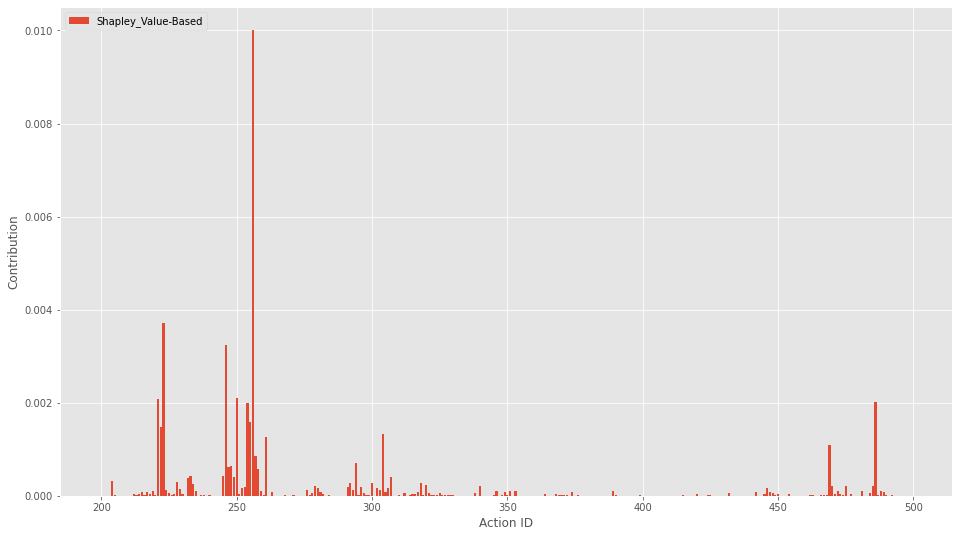

In [129]:
contribution_rate = attributions / total   # hoho_todo: 如果其中某个动作是正数，但总值为负数 怎么办

action_idx_range = range(200, 500)
# action_idx_range = range(len(contribution_rate))

fig = plt.figure(figsize = (16, 9))
plt.bar(action_idx_range, contribution_rate[action_idx_range], label='Shapley_Value-Based')
plt.xlabel('Action ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()

### 奖励重分配

In [130]:
shav_arr = np.zeros(actions_count)
for key, value in result.items():
    action_idx = all_actions.index(key)
    if action_idx is not None:
        shav_arr[action_idx] = value
    
data_shapley_value = pd.DataFrame({"action": all_actions, "shapley_value": shav_arr})
data_shapley_value

,action,shapley_value
0,a0b0,-8.124167
1,a0c0,-0.936794
2,a0d0,0.000000
3,a0e0,0.000000
4,a0f0,0.000000
...,...,...
2081,e7c9,0.000000
2082,e7g5,0.000000
2083,g5e7,0.000000
2084,g9i7,0.000000


In [131]:
data2[data2["win"] == -1]

,match_id,action_sequence,chapture_value,win
0,0-0,"f0e1,h2g2",-11.20,-1
1,0-1,"f0e1,h2g2",-11.20,-1
2,0-10,"e0e1,e1f1,i0i2,h2g2,a0a1,b2b5,i2i0,b5h5",-39.07,-1
3,0-11,"f0e1,h2g2",-11.20,-1
4,0-12,"e0e1,b2b4,h2e2,e2g2,c0a2,b0d1,e1e2,a2c4,e2f2,g...",-101.55,-1
...,...,...,...,...
10049,99-5,"f0e1,h2g2",-11.20,-1
10050,99-6,"e0e1,h2d2,d2d5,b2g2,g0i2,a3a4,a4a5,a0a5,b0c2,g...",-99.55,-1
10051,99-7,"f0e1,h2g2",-11.20,-1
10052,99-8,"f0e1,h2g2",-11.20,-1


In [149]:
win = -1 # 赢为1，输为-1
check_match_id = "0-12"

match_data = data[data["match_id"] == check_match_id]
match_actions = match_data["action"].values
match_contribution_data = data_shapley_value[data_shapley_value["action"].isin(match_actions)].copy()
total_reward_expect = len(match_contribution_data) * win

total_contribution = match_contribution_data["shapley_value"].sum()
match_contribution_data["mine"] = match_contribution_data["shapley_value"].apply(lambda c: c / total_contribution * total_reward_expect)
match_contribution_data["alphago_zero"] = len(match_contribution_data) * [win]

match_contribution_data

,action,shapley_value,mine,alphago_zero
222,b0d1,-14.824493,-0.463572,-1
256,b2b4,-100.643963,-3.147207,-1
291,b4a4,-1.875649,-0.058653,-1
908,e0e1,-80.549810,-2.518849,-1
930,e1e2,-16.650151,-0.520662,-1
948,e2f2,-5.820705,-0.182017,-1
949,e2g2,-20.297256,-0.634709,-1
1426,g2h2,-4.632996,-0.144877,-1
1659,h2e2,-30.658959,-0.958727,-1
2054,a2c4,-17.846135,-0.558061,-1


In [150]:
# 按回出棋的顺序
result_data = pd.merge(match_data, match_contribution_data, on = "action", how = "left")
result_data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,shapley_value,mine,alphago_zero
0,0-12,16945266706740,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,e0e1,RNBA1ABNR/4K4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,-80.549810,-2.518849,-1
1,0-12,16945266706741,RNBA1ABcR/4K4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,b2b4,RNBA1ABcR/4K4/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/1c...,False,A,-4.10,0,-100.643963,-3.147207,-1
2,0-12,16945266706742,RNBA1cB1R/4K4/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/1c...,h2e2,RNBA1cB1R/4K4/4C4/P1P1P1P1P/1C7/9/p1p1p1p1p/1c...,False,R,-27.87,0,-30.658959,-0.958727,-1
3,0-12,16945266706743,RNBA2B1c/4K4/4C4/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7...,e2g2,RNBA2B1c/4K4/6C2/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7...,False,A,-4.10,0,-20.297256,-0.634709,-1
4,0-12,16945266706744,RNBc2B2/4K4/6C2/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,c0a2,RN1c2B2/4K4/B5C2/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7...,False,R,-27.87,0,-57.966910,-1.812666,-1
5,0-12,16945266706745,cN4B2/4K4/B5C2/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/9...,b0d1,c5B2/3NK4/B5C2/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/9...,False,P,-1.00,0,-14.824493,-0.463572,-1
6,0-12,16945266706746,6B2/3NK4/B5C2/c1P1P1P1P/1C7/9/p1p1p1p1p/1c7/9/...,e1e2,6B2/3N5/B3K1C2/c1P1P1P1P/1C7/9/p1p1p1p1p/1c7/9...,False,,0.00,0,-16.650151,-0.520662,-1
7,0-12,16945266706747,6B2/3N5/B3K1C2/c1P1P1P1P/1C7/9/p1p1p1p1p/1c6n/...,a2c4,6B2/3N5/4K1C2/c1P1P1P1P/1CB6/9/p1p1p1p1p/1c6n/...,False,,0.00,0,-17.846135,-0.558061,-1
8,0-12,16945266706748,6B2/3N5/4K1C2/c1P1P1P1P/1CB6/9/p1p1p1p1p/2c5n/...,e2f2,6B2/3N5/5KC2/c1P1P1P1P/1CB6/9/p1p1p1p1p/2c5n/9...,False,,0.00,0,-5.820705,-0.182017,-1
9,0-12,16945266706749,6B2/3N5/5KC2/c1P1P1P1P/1CB6/9/p1p1p1p1p/2c5n/9...,g2h2,6B2/3N5/5K1C1/c1P1P1P1P/1CB6/9/p1p1p1p1p/2c5n/...,False,C,-25.41,0,-4.632996,-0.144877,-1


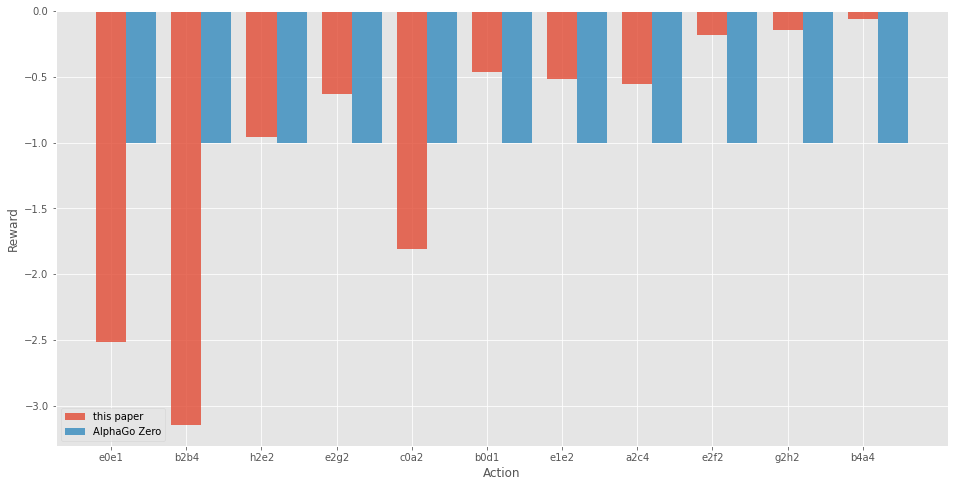

In [151]:
custom_ticks = list(range(len(result_data)))
custom_labels = result_data["action"].values.tolist()
plt.figure(figsize = (16, 8))
plt.bar(range(len(result_data)), result_data["mine"], width = 0.4, alpha = 0.8, label = 'this paper' )
plt.bar([i + 0.4 for i in range(len(result_data))], result_data["alphago_zero"], width = 0.4, alpha = 0.8, label = 'AlphaGo Zero')
plt.xticks(custom_ticks, custom_labels)
plt.xlabel('Action')
plt.ylabel('Reward')
plt.legend(loc='lower left')
plt.show()

### 以下计算shapley value 方法复杂度很高，暂不采用

In [13]:
# 即生成列表List的所有组合
# 如List = [1,2,3]，则返回[], [1], [2], [3], [1,2], [1,3], [2,3], [1,2,3]
def power_set(List):
    PS = [list(j) for i in range(len(List)) for j in itertools.combinations(List, i+1)]
    return PS

In [14]:
def subsets(s):
    if len(s) == 1:
        return s
    else:
        sub_channels = []
        for i in range(1, len(s) + 1):
            sub_channels.extend(map(list, itertools.combinations(s, i)))
    return list(map(",".join, map(sorted, sub_channels)))

In [16]:
def value_function(A, C_values):
    subsets_of_A = subsets(A)
    worth_of_A = 0
    for subset in subsets_of_A:
        print(f"subset: {subset}")
        if subset in C_values:
            worth_of_A += C_values[subset]
    return worth_of_A

In [17]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [23]:
#demo
data_demo = data3.head(2)

c_values = data_demo.set_index("action_sequence").to_dict()["chapture_value"]    
channels = []
for i in range(len(data_demo)):
    row = data_demo.iloc[i]
    actions = row["action_sequence"].split(",")
    channels.extend(actions)
    
channels = list(set(channels))
print(f"channels count: {len(channels)}")

power_channels = power_set(channels)
print(c_values)
    
# v_values = {}
# for A in power_channels:
#     v_values[','.join(sorted(A))] = value_function(A, c_values)
# print(f"v_values: {v_values}")


channels count: 16
{'a0a1,a1c1,b2b8,c1f1,f1f8,c3c4,g0i2,e3e4,c0a2': -96.17, 'a0a1,b2b4,a1b1,h2d2,g0e2,b1f1,d0e1,e1f2': -37.61}


In [21]:
v_values["a0a1,a1c1,b2b8,c1f1,f1f8,c3c4,g0i2,e3e4,c0a2"]

KeyError: 'a0a1,a1c1,b2b8,c1f1,f1f8,c3c4,g0i2,e3e4,c0a2'

In [28]:
def calculate_shapley(df, channel_name, conv_name):
    c_values = df.set_index(channel_name).to_dict()[conv_name]    
    df['channels'] = df[channel_name].apply(lambda x: x if len(x.split(",")) == 1 else np.nan)  # hoho: 这里可能会遗漏一些channel
    channels = list(df['channels'].dropna().unique())
    
#     print(f"power_set: {power_set(channels)}")
    
    v_values = {}
    for A in power_set(channels):
        v_values[','.join(sorted(A))] = v_function(A, c_values)
    n = len(channels)
    shapley_values = defaultdict(int)
    
    for channel in channels:
        for A in v_values.keys():
            if channel not in A.split(","):
                cardinal_A = len(A.split(","))  # 没有channel的长度
                A_with_channel = A.split(",")
                A_with_channel.append(channel)
                A_with_channel = ",".join(sorted(A_with_channel))
                weight = (factorial(cardinal_A) * factorial(n - cardinal_A - 1) / factorial(n)) # Weight = |S|!(n-|S|-1)!/n!
                contrib = (v_values[A_with_channel] - v_values[A]) # Marginal contribution = v(S U {i})-v(S)
                shapley_values[channel] += weight * contrib
                
        # Add the term corresponding to the empty set
        shapley_values[channel]+= v_values[channel] / n 
        
    return shapley_values

### 计算shapley value 方法复杂度很高，暂不采用